<a href="https://colab.research.google.com/github/dheerajshah13/Deep-Learning-Projects/blob/master/medical_trails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(64,100)
  train_samples.append(random_older)
  train_labels.append(0)

In [4]:
for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [5]:
for i in train_samples:
  print(i)

52
67
45
88
36
98
31
76
14
90
53
73
42
82
61
99
47
100
43
74
13
93
25
96
16
83
33
92
25
91
28
65
18
90
46
64
30
90
47
70
47
99
33
64
47
100
43
76
32
70
45
64
51
70
54
95
49
71
34
81
22
65
58
70
63
77
15
67
42
76
64
67
18
84
13
70
19
92
39
94
15
66
61
99
28
82
53
89
14
89
52
82
47
66
48
91
47
64
60
73
55
95
41
88
48
77
59
83
28
86
57
85
26
84
64
83
38
71
27
80
46
72
56
83
49
74
55
99
60
79
37
95
19
81
49
73
40
77
31
81
25
92
59
80
33
94
42
99
19
71
23
94
43
84
36
82
64
70
60
85
51
83
48
69
64
84
37
91
59
89
23
78
61
85
38
75
45
85
63
70
61
85
63
87
59
83
26
84
16
71
51
93
34
73
21
95
14
94
27
91
60
77
20
84
48
87
36
88
54
71
35
75
25
87
16
81
39
78
21
87
49
80
21
97
21
79
38
68
16
90
51
90
62
98
49
67
52
73
33
66
57
86
34
66
49
88
36
83
53
91
59
99
64
92
56
81
53
100
14
89
41
70
25
85
26
78
21
73
50
93
29
98
40
92
19
66
38
74
14
85
30
79
42
100
17
92
25
70
50
65
33
85
55
96
23
91
24
76
42
71
21
77
22
91
35
69
25
74
59
86
21
69
26
97
15
90
64
81
60
80
18
72
52
96
38
69
58
85
64
95
22
98


In [6]:
train_labled= np.array(train_labels)
train_samples = np.array(train_samples)
train_labled,train_samples = shuffle(train_labled, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
model = Sequential([
                    Dense(units=16, input_shape =(1,),activation = 'relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x = scaled_train_samples, y =train_labled, batch_size =10,epochs= 30, verbose =2)

Epoch 1/30
210/210 - 0s - loss: 0.6714 - accuracy: 0.5438
Epoch 2/30
210/210 - 0s - loss: 0.6426 - accuracy: 0.6424
Epoch 3/30
210/210 - 0s - loss: 0.6108 - accuracy: 0.7143
Epoch 4/30
210/210 - 0s - loss: 0.5789 - accuracy: 0.7576
Epoch 5/30
210/210 - 0s - loss: 0.5476 - accuracy: 0.7800
Epoch 6/30
210/210 - 0s - loss: 0.5163 - accuracy: 0.8105
Epoch 7/30
210/210 - 0s - loss: 0.4855 - accuracy: 0.8329
Epoch 8/30
210/210 - 0s - loss: 0.4562 - accuracy: 0.8433
Epoch 9/30
210/210 - 0s - loss: 0.4293 - accuracy: 0.8595
Epoch 10/30
210/210 - 0s - loss: 0.4048 - accuracy: 0.8767
Epoch 11/30
210/210 - 0s - loss: 0.3833 - accuracy: 0.8881
Epoch 12/30
210/210 - 0s - loss: 0.3646 - accuracy: 0.8914
Epoch 13/30
210/210 - 0s - loss: 0.3484 - accuracy: 0.8981
Epoch 14/30
210/210 - 0s - loss: 0.3344 - accuracy: 0.9019
Epoch 15/30
210/210 - 0s - loss: 0.3227 - accuracy: 0.9114
Epoch 16/30
210/210 - 0s - loss: 0.3127 - accuracy: 0.9129
Epoch 17/30
210/210 - 0s - loss: 0.3043 - accuracy: 0.9138
Epoch 

In [13]:
model.fit(x=scaled_train_samples, y=train_labled,validation_split =0.1,verbose =2,batch_size =10,epochs=30 )

Epoch 1/30
189/189 - 0s - loss: 0.2667 - accuracy: 0.9265 - val_loss: 0.2081 - val_accuracy: 0.9667
Epoch 2/30
189/189 - 0s - loss: 0.2657 - accuracy: 0.9312 - val_loss: 0.2064 - val_accuracy: 0.9476
Epoch 3/30
189/189 - 0s - loss: 0.2648 - accuracy: 0.9275 - val_loss: 0.2052 - val_accuracy: 0.9667
Epoch 4/30
189/189 - 0s - loss: 0.2640 - accuracy: 0.9349 - val_loss: 0.2039 - val_accuracy: 0.9667
Epoch 5/30
189/189 - 0s - loss: 0.2632 - accuracy: 0.9339 - val_loss: 0.2027 - val_accuracy: 0.9667
Epoch 6/30
189/189 - 0s - loss: 0.2625 - accuracy: 0.9328 - val_loss: 0.2016 - val_accuracy: 0.9667
Epoch 7/30
189/189 - 0s - loss: 0.2616 - accuracy: 0.9349 - val_loss: 0.2003 - val_accuracy: 0.9667
Epoch 8/30
189/189 - 0s - loss: 0.2609 - accuracy: 0.9328 - val_loss: 0.1995 - val_accuracy: 0.9667
Epoch 9/30
189/189 - 0s - loss: 0.2603 - accuracy: 0.9349 - val_loss: 0.1982 - val_accuracy: 0.9667
Epoch 10/30
189/189 - 0s - loss: 0.2597 - accuracy: 0.9349 - val_loss: 0.1976 - val_accuracy: 0.9667

In [14]:
test_samples =[]
test_labels = []

In [15]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [16]:
prediction=model.predict(x= scaled_test_samples,batch_size =10,verbose= 0)

In [17]:
for i in prediction:
  print(i)

[0.96520585 0.0347941 ]
[0.11218848 0.88781154]
[0.95217127 0.04782869]
[0.9705569  0.02944309]
[0.96686023 0.03313973]
[0.94098634 0.05901372]
[0.97087246 0.02912757]
[0.9674581 0.0325418]
[0.9674581 0.0325418]
[0.97087246 0.02912757]
[0.89737177 0.10262826]
[0.1262101  0.87378997]
[0.21037184 0.78962815]
[0.9674581 0.0325418]
[0.08078889 0.9192111 ]
[0.96926135 0.03073861]
[0.9657766  0.03422337]
[0.9675643  0.03243579]
[0.24658053 0.7534195 ]
[0.75884306 0.24115697]
[0.05787305 0.9421269 ]
[0.03464956 0.9653505 ]
[0.01210638 0.98789364]
[0.82604486 0.17395507]
[0.9094091  0.09059086]
[0.02054206 0.979458  ]
[0.02913316 0.97086686]
[0.03464956 0.9653505 ]
[0.97023815 0.02976192]
[0.21037184 0.78962815]
[0.9699159 0.0300841]
[0.47797176 0.52202827]
[0.89737177 0.10262826]
[0.9675643  0.03243579]
[0.8835708  0.11642919]
[0.97118473 0.02881533]
[0.02447274 0.9755273 ]
[0.96959037 0.03040965]
[0.06295359 0.9370464 ]
[0.01723157 0.9827685 ]
[0.97018796 0.02981202]
[0.24658053 0.7534195 ]


In [18]:
rounded_prediction= np.argmax(prediction,axis =-1)

In [19]:
rounded_prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,

In [20]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_prediction)

In [23]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[195  15]
 [ 10 200]]


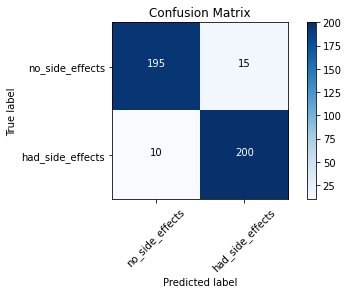

In [25]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [27]:
model.save('medical_trails.h5')

In [29]:
from tensorflow.keras.models import load_model
new_model = load_model('medical_trails.h5')

In [30]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [31]:
new_model.optimizer

In [ ]:
new_model.weights

In [34]:
json_string = model.to_json()

In [35]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [36]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [37]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
